In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf

/Users/danielzhang/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/danielzhang/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/danielzhang/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/danielzhang/anaconda3/lib/python3.6/site-packages/tensorf

In [3]:
tf.__version__

'1.13.1'

## 1 MNIST数据集

In [27]:
from keras.datasets import mnist

In [28]:
mnist_data = mnist.load_data()

In [29]:
type(mnist_data)

tuple

In [30]:
len(mnist_data)

2

In [31]:
type(mnist_data[0])

tuple

In [32]:
(train_images, train_labels), (test_images, test_labels) = mnist_data

In [33]:
train_images.shape

(60000, 28, 28)

In [34]:
train_labels.shape

(60000,)

In [35]:
test_images.shape

(10000, 28, 28)

In [36]:
test_labels.shape

(10000,)

In [37]:
img = train_images[0,:,:]
img.shape

(28, 28)

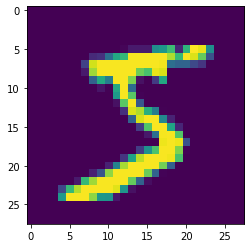

In [38]:
plt.imshow(img)

In [39]:
from keras import models
from keras import layers

定义模型

In [40]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape = (28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [41]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


编译模型

In [42]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

准备图像数据

In [43]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [44]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [45]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.2583 - accuracy: 0.9246
Epoch 2/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.1036 - accuracy: 0.9690
Epoch 3/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.0687 - accuracy: 0.9793
Epoch 4/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0492 - accuracy: 0.9851
Epoch 5/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0374 - accuracy: 0.9892


In [46]:
network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 62us/step


[0.07661306103027891, 0.978600025177002]

___

## 2 Word Embedding

### 2.1 one-hot编码

In [5]:
samples = ['My cat sat on the mat.', 'The dog ate my homework.']
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

In [6]:
token_index

{'My': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat.': 6,
 'The': 7,
 'dog': 8,
 'ate': 9,
 'my': 10,
 'homework.': 11}

In [7]:
len(token_index)

11

In [8]:
max_length = 10
results = np.zeros(shape=(len(samples),max_length,max(token_index.values()) + 1))

In [10]:
# 注意result的shape
results.shape

(2, 10, 12)

`result`中，第一个维度对应于样本数，也就是对应于句子，这里长度为2，对应于两个句子；  
第二个维度对应于使用的字典长度；  
第三个维度对应于每个句子里的单词，长度为字典长度+1，没有出现在字典中的单词那一列全为0

In [13]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1

In [14]:
# 第一个句子
t1 = results[0,:,:]
t1.shape

(10, 12)

In [15]:
t1

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

----

+ keras里的one-hot编码  
keras里的one-hot函数不是通常的one-hot编码，而是将字符串通过hash表散列到一个定长的字段里，有可能会出现冲突现象

In [17]:
from keras.preprocessing.text import one_hot,Tokenizer

In [18]:
samples[0]

'My cat sat on the mat.'

In [20]:
one_hot(samples[0], n = max_length)

[7, 2, 9, 6, 8, 7]

### 2.2 Embedding层的使用

In [57]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences

官方说明
> Embedding层用于将正整数（索引值）转换为固定尺寸的稠密向量。它只能在第一层使用。

官方的文档写的比较差劲，可以看cross-validate上的这个[回答](https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work)

`Embedding(input_dim,output_dim,input_length=None)`  
+ input_dim：指定的是字典的长度，这个长度就是每个单词对应的one-hot编码的稀疏向量的长度
+ ouput_dim：指定的是转换后的词向量的长度
+ input_length：指定的是输入序列的长度

Embedding层的输入是`(samples, sequence_length)`，输出是 `(samples, sequence_length, embedding_dimension)`  
但是需要注意的是，**Embedding的输入里每个sample的sequence不是实际的one-hot编码，而是一个整数编码**

比如现在有两个句子：
> Hope to see you soon.  
Nice to see you again

这里做的转换是，首先建立一个词典（按照词的出现顺序来）对上述的两个句子编码，得到
`[ [0, 1, 2, 3, 4], [5, 1, 2, 3, 6] ]`。  
总共出现了 7 个不同的词，所以词典的长度为 7 ，这个长度也是one-hot编码后每个词对应的向量长度。  
现在假设将每个词的one-hot稀疏向量（长度为7）转换成一个长度为 3 的密集向量。

In [69]:
# 整数编码的句子
sentence = [ [0, 1, 2, 3, 4], [5, 1, 2, 3, 6] ]
#词典的大小
vocab_size = 7 
# 输出词向量的大小
vec_size = 3 
# 输入序列的大小，每一个句子的长度
# 这里两个句子的长度一致，如果不一致，短的那个需要补0，保证所有的句子序列长度一样
input_len = 5

In [70]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=vec_size, input_length=input_len))
model.compile('rmsprop', 'mse')

In [71]:
sentence_array = np.array(sentence)
sentence_array

array([[0, 1, 2, 3, 4],
       [5, 1, 2, 3, 6]])

In [75]:
word_vec = model.predict(sentence_array)
word_vec

array([[[-0.03701192, -0.02054586, -0.01332249],
        [ 0.00252581,  0.04715172,  0.04344523],
        [-0.02058136, -0.04706035, -0.00219276],
        [-0.00323671, -0.00525161, -0.04735143],
        [-0.00494398,  0.04770916, -0.01719525]],

       [[-0.03838653,  0.02133698, -0.03841873],
        [ 0.00252581,  0.04715172,  0.04344523],
        [-0.02058136, -0.04706035, -0.00219276],
        [-0.00323671, -0.00525161, -0.04735143],
        [ 0.04975243, -0.00027483,  0.02707035]]], dtype=float32)

In [76]:
word_vec.shape

(2, 5, 3)

上面得到的词向量`word_vec`的维度是 (2, 5, 3)：  
2对应于2个句子，5对应于每个句子里的单词数，3对应于每个单词转换后的长度为3的词向量

可以通过如下方式查看Embedding层的词向量矩阵，它的维度是 `(7, 3)`

In [87]:
embedding = model.get_layer(index=0)
vec_matrix = embedding.get_weights()[0]
print(vec_matrix.shape)
vec_matrix

(7, 3)


array([[-0.03701192, -0.02054586, -0.01332249],
       [ 0.00252581,  0.04715172,  0.04344523],
       [-0.02058136, -0.04706035, -0.00219276],
       [-0.00323671, -0.00525161, -0.04735143],
       [-0.00494398,  0.04770916, -0.01719525],
       [-0.03838653,  0.02133698, -0.03841873],
       [ 0.04975243, -0.00027483,  0.02707035]], dtype=float32)

_____

+ 实际的操作中，编码这一步可以由keras自带的函数进行处理，以下的这个例子是一个完整的流程

In [113]:
sentence = ['My cat sat on the mat.', 'The dog ate my homework.']

In [114]:
# 词典大小选大一点，避免keras里的one-hot散列出现冲突
vocab_size = 15
# 输出的词向量的长度
vec_size = 3
# 指定每个句子的最大长度，也就是输入序列的长度
max_len = 6
sentence_one_hot = [one_hot(sample, vocab_size) for sample in sentence]

In [115]:
sentence_one_hot

[[10, 6, 5, 10, 8, 4], [8, 2, 4, 10, 4]]

使用`pad_sentences`函数对不同长度的句子进行填充，使其长度相同，需要传入的参数是用于控制句子最大长度的max_len

In [116]:
sentence_padding = pad_sequences(sentence_one_hot, maxlen=max_len, padding='post')

In [117]:
sentence_padding

array([[10,  6,  5, 10,  8,  4],
       [ 8,  2,  4, 10,  4,  0]])

In [120]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=vec_size, input_length=max_len))
model.compile('rmsprop', 'mse')

In [121]:
sentence_vec = model.predict(sentence_padding)

In [122]:
print(sentence_vec.shape)
sentence_vec

(2, 6, 3)


array([[[ 0.01103178, -0.03958328, -0.03749012],
        [-0.0211916 , -0.02169323,  0.01342097],
        [-0.04826014,  0.02267882, -0.02476395],
        [ 0.01103178, -0.03958328, -0.03749012],
        [ 0.03592021,  0.04819529,  0.01387764],
        [ 0.02788011, -0.04296367,  0.04696837]],

       [[ 0.03592021,  0.04819529,  0.01387764],
        [-0.0180536 ,  0.03892751, -0.04089652],
        [ 0.02788011, -0.04296367,  0.04696837],
        [ 0.01103178, -0.03958328, -0.03749012],
        [ 0.02788011, -0.04296367,  0.04696837],
        [ 0.0320329 , -0.01912428,  0.00285627]]], dtype=float32)

In [123]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 6, 3)              45        
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [126]:
embedding = model.get_layer(index=0)
vec_matrix = embedding.get_weights()[0]
print(vec_matrix.shape)
vec_matrix

(15, 3)


array([[ 0.0320329 , -0.01912428,  0.00285627],
       [-0.02730839,  0.01685596, -0.01156116],
       [-0.0180536 ,  0.03892751, -0.04089652],
       [-0.03986708, -0.02954321,  0.03043226],
       [ 0.02788011, -0.04296367,  0.04696837],
       [-0.04826014,  0.02267882, -0.02476395],
       [-0.0211916 , -0.02169323,  0.01342097],
       [ 0.03875934,  0.01617103, -0.00352401],
       [ 0.03592021,  0.04819529,  0.01387764],
       [ 0.02668465, -0.02652601,  0.00034415],
       [ 0.01103178, -0.03958328, -0.03749012],
       [-0.00063401, -0.02678632,  0.00544585],
       [-0.01866852,  0.03482634,  0.00043851],
       [-0.01608972,  0.01857305,  0.0340006 ],
       [-0.03630603,  0.02589286,  0.04795275]], dtype=float32)

____

## 3 IMDB数据集练习

In [6]:
from keras.datasets import imdb
from keras import preprocessing

In [7]:
imdb_data = imdb.load_data()

In [8]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [107]:
train_data.shape

(25000,)

In [108]:
test_data.shape

(25000,)

In [109]:
type(train_data[0])

list

In [110]:
train_data[0][0:5]

[1, 14, 22, 16, 43]

In [111]:
# 每条句子的长度都不一样
[len(sentence) for sentence in train_data][0:10]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130]

In [112]:
# 获取每个单词的word-index字典
word_index = imdb.get_word_index()

In [56]:
type(word_index)

dict

In [57]:
len(word_index)

88584

In [58]:
list(word_index.items())[0:5]

[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951)]

以下将train_data里的index转回原来的word

In [59]:
reverse_word_index = dict([(index, word) for (word, index) in word_index.items()])

In [60]:
decode_review = [reverse_word_index.get(index-3, '?') for index in train_data[0]]
decode_review[0:6]

['?', 'this', 'film', 'was', 'just', 'brilliant']

### 3.1 数据预处理

In [61]:
train_data[0][0:5]

[1, 14, 22, 16, 43]

In [62]:
def review_vectorize(review, dict_len=10000):
    result_matrix = np.zeros((len(review), dict_len))
    for i,sentence in enumerate(review):
        result_matrix[i, sentence] = 1.0
    return result_matrix

In [63]:
train_matrix = review_vectorize(train_data)
test_matrix = review_vectorize(test_data)

In [64]:
train_matrix.shape

(25000, 10000)

In [65]:
test_matrix.shape

(25000, 10000)

In [66]:
labels_train = np.array(train_labels).astype("float32")
labels_test = np.array(test_labels).astype("float32")

In [67]:
X_val = train_matrix[0:10000]
X_train = train_matrix[10000:]
y_val = labels_train[0:10000]
y_train = labels_train[10000:]

### 3.2 建模

In [68]:
model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [69]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])

In [70]:
model.fit(X_train,y_train, epochs=5, batch_size=512,  validation_data=[X_val, y_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 3s 208us/step - loss: 0.5069 - accuracy: 0.7885 - val_loss: 0.3779 - val_accuracy: 0.8693
Epoch 2/5
15000/15000 [==============================] - 1s 97us/step - loss: 0.2978 - accuracy: 0.9047 - val_loss: 0.3430 - val_accuracy: 0.8545
Epoch 3/5
15000/15000 [==============================] - 1s 82us/step - loss: 0.2205 - accuracy: 0.9283 - val_loss: 0.2775 - val_accuracy: 0.8917
Epoch 4/5
15000/15000 [==============================] - 1s 97us/step - loss: 0.1696 - accuracy: 0.9460 - val_loss: 0.2826 - val_accuracy: 0.8888
Epoch 5/5
15000/15000 [==============================] - 1s 89us/step - loss: 0.1436 - accuracy: 0.9525 - val_loss: 0.2884 - val_accuracy: 0.8873


### 3.3 Embedding层用于IMDB数据集

In [9]:
from keras.datasets import imdb

In [10]:
from keras import preprocessing

In [11]:
# 字典的所选取的最大长度
max_features = 10000
# 每条评论的截断长度
max_len = 20

In [12]:
(x_train, y_train), (x_test, y_test) = imdb.load_data( num_words=max_features)

In [13]:
x_train.shape

(25000,)

In [14]:
y_train.shape

(25000,)

In [16]:
# 每条句子的长度都不一样
[len(sentence) for sentence in train_data[0:10]]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130]

In [17]:
# pad_sequances用于填充序列，也就是将x_train中不同长度的向量填充成同样的长度（尾部填充）
x_train_pad = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test_pad = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [18]:
x_train_pad.shape

(25000, 20)

In [19]:
type(x_train_pad)

numpy.ndarray

In [21]:
# 查看第一个句子
x_train_pad[0,:]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32], dtype=int32)

In [22]:
from keras.models import Sequential
from  keras.layers import Flatten,Dense,Embedding

In [23]:
model = Sequential()

In [24]:
# 字典长度设置为max_features，这里想将10000维的稀疏one-hot向量转成8维的词向量
model.add(Embedding(max_features, 8, input_length=max_len))

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
# 将Embedding层输出的三维张量 (samples, max_len, 8) 拉平成 二维张量 (samples, max_len * 8)
model.add(Flatten())

In [26]:
# 再添加一个全连接层，输出为 1 个神经元，激活函数为sigmoid函数
model.add(Dense(units=1, activation='sigmoid'))

In [27]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(x_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 4s 205us/step - loss: 0.6727 - acc: 0.6123 - val_loss: 0.6234 - val_acc: 0.6996
Epoch 2/5
20000/20000 [==============================] - 3s 146us/step - loss: 0.5463 - acc: 0.7458 - val_loss: 0.5259 - val_acc: 0.7304
Epoch 3/5
20000/20000 [==============================] - 3s 143us/step - loss: 0.4623 - acc: 0.7846 - val_loss: 0.4987 - val_acc: 0.7470
Epoch 4/5
20000/20000 [==============================] - 3s 171us/step - loss: 0.4223 - acc: 0.8075 - val_loss: 0.4920 - val_acc: 0.7566
Epoch 5/5
20000/20000 [==============================] - 4s 188us/step - loss: 0.3962 - acc: 0.8219 - val_loss: 0.4918 - val_acc: 0.7560


In [32]:
model.evaluate(x_test_pad, y_test)

25000/25000 [==============================] - 1s 23us/step


[0.48260217396736144, 0.7646399736404419]

---

## 4 RNN

### 4.1 SimpleRNN

In [33]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

+ 返回序列里每个输出的RNN

In [34]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


+ 返回序列最后一输出的RNN

In [35]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=False))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


+ 堆叠的RNN

In [37]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 326,240
Trainable params: 326,240
Non-trainable params: 0
_________________________________________________________________


______

### 4.2 SimpleRNN用于IMDB

In [38]:
max_features = 10000
max_len = 500
batch_size = 32

In [39]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=max_features)

In [40]:
train_data.shape

(25000,)

In [41]:
x_train_pad = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test_pad = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [42]:
x_train_pad.shape

(25000, 500)

In [46]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=32, input_length=max_len))
model.add(SimpleRNN(units=32))
model.add(Dense(units=1,activation='sigmoid'))

In [47]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [49]:
history = model.fit(x_train_pad, y_train, epochs=2, batch_size=256, validation_split= 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 50s 3ms/step - loss: 0.3020 - acc: 0.8798 - val_loss: 0.2747 - val_acc: 0.8938
Epoch 2/2
20000/20000 [==============================] - 52s 3ms/step - loss: 0.2621 - acc: 0.9001 - val_loss: 0.3435 - val_acc: 0.8508


In [50]:
model.evaluate(x_test_pad, y_test)

25000/25000 [==============================] - 44s 2ms/step


[0.37567727951049806, 0.8298400044441223]

____

### 4.3 LSTM

In [51]:
from keras.layers import LSTM

In [52]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=32, input_length=max_len))
model.add(LSTM(units=32))
model.add(Dense(units=1, activation='sigmoid'))

In [53]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [54]:
history = model.fit(x_train_pad, y_train, batch_size=256, epochs=3, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 164s 8ms/step - loss: 0.5743 - acc: 0.7226 - val_loss: 0.5082 - val_acc: 0.7580
Epoch 2/3
20000/20000 [==============================] - 166s 8ms/step - loss: 0.3359 - acc: 0.8731 - val_loss: 0.6424 - val_acc: 0.7686
Epoch 3/3
20000/20000 [==============================] - 167s 8ms/step - loss: 0.2573 - acc: 0.9062 - val_loss: 0.5684 - val_acc: 0.8172
